# 73. Keras basics

In [1]:
import numpy as np
from numpy import genfromtxt # generates array from text

In [2]:
data = genfromtxt("DATA/bank_note_data.txt", delimiter=',')
data # last colum says if it was forgery or not, other columns = features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [3]:
data.shape

(1372, 5)

In [4]:
labels = data[:,4]
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [5]:
features = data[:,:4]
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [6]:
X = features
y = labels

In [7]:
from sklearn.model_selection import train_test_split # this will shuffle the data too before spliting into train/test sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
X_train

array([[-0.8734  , -0.033118, -0.20165 ,  0.55774 ],
       [ 2.0177  ,  1.7982  , -2.9581  ,  0.2099  ],
       [-0.36038 ,  4.1158  ,  3.1143  , -0.37199 ],
       ...,
       [-7.0364  ,  9.2931  ,  0.16594 , -4.5396  ],
       [-3.4605  ,  2.6901  ,  0.16165 , -1.0224  ],
       [-3.3582  , -7.2404  , 11.4419  , -0.57113 ]])

In [10]:
X_train.shape

(919, 4)

In [11]:
X_test.shape

(453, 4)

In [12]:
y_train.shape

(919,)

In [13]:
y_test.shape

(453,)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler_obj = MinMaxScaler()

In [16]:
scaler_obj.fit(X_train) # Compute the minimum and maximum to be used for later scaling.
scaled_X_train = scaler_obj.transform(X_train)
scaled_X_test = scaler_obj.transform(X_test)

In [17]:
scaled_X_train.max()

1.0000000000000002

In [18]:
scaled_X_train.min()

0.0

In [19]:
scaled_X_test.max()

1.02679563427227

In [20]:
scaled_X_test.min()

-0.0010694864308909147

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# keras.__version__

In [24]:
model = Sequential()
model.add(Dense(4, 'relu'))

model.add(Dense(8, 'relu'))

model.add(Dense(1,'sigmoid'))

In [25]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
model.fit(scaled_X_train, y_train, epochs=50, verbose=2)

2022-09-14 17:58:00.888831: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-14 17:58:00.889476: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


Train on 919 samples
Epoch 1/50
919/919 - 1s - loss: 0.6922 - accuracy: 0.5495
Epoch 2/50
919/919 - 0s - loss: 0.6864 - accuracy: 0.5495
Epoch 3/50
919/919 - 0s - loss: 0.6805 - accuracy: 0.5495
Epoch 4/50
919/919 - 0s - loss: 0.6763 - accuracy: 0.5495
Epoch 5/50
919/919 - 0s - loss: 0.6735 - accuracy: 0.5495
Epoch 6/50
919/919 - 0s - loss: 0.6708 - accuracy: 0.5495
Epoch 7/50
919/919 - 0s - loss: 0.6682 - accuracy: 0.5495
Epoch 8/50
919/919 - 0s - loss: 0.6656 - accuracy: 0.5495
Epoch 9/50
919/919 - 0s - loss: 0.6620 - accuracy: 0.5495
Epoch 10/50
919/919 - 0s - loss: 0.6583 - accuracy: 0.5495
Epoch 11/50
919/919 - 0s - loss: 0.6544 - accuracy: 0.5495
Epoch 12/50
919/919 - 0s - loss: 0.6496 - accuracy: 0.5495
Epoch 13/50
919/919 - 0s - loss: 0.6441 - accuracy: 0.5495
Epoch 14/50
919/919 - 0s - loss: 0.6375 - accuracy: 0.5495
Epoch 15/50
919/919 - 0s - loss: 0.6300 - accuracy: 0.5495
Epoch 16/50
919/919 - 0s - loss: 0.6214 - accuracy: 0.5571
Epoch 17/50
919/919 - 0s - loss: 0.6123 - ac

In [27]:
model.predict_classes(scaled_X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

In [28]:
model.metrics_names

['loss', 'accuracy']

In [29]:
from sklearn.metrics import confusion_matrix, classification_report

In [30]:
predictions = model.predict_classes(scaled_X_test)

In [31]:
confusion_matrix(y_test, predictions)

array([[252,   5],
       [ 14, 182]])

In [32]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       257
         1.0       0.97      0.93      0.95       196

    accuracy                           0.96       453
   macro avg       0.96      0.95      0.96       453
weighted avg       0.96      0.96      0.96       453



In [33]:
model.save('mysupermodel.h5')

In [34]:
from tensorflow.keras.models import load_model

In [35]:
newmodel = load_model('mysupermodel.h5')
newmodel.predict_classes(scaled_X_test)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
    

# 77. Keras Convolutional Neural Networks with MNIST

In [1]:
from tensorflow.keras.datasets import mnist

In [53]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
x_train.shape

(60000, 28, 28)

In [6]:
single_img = x_train[0]

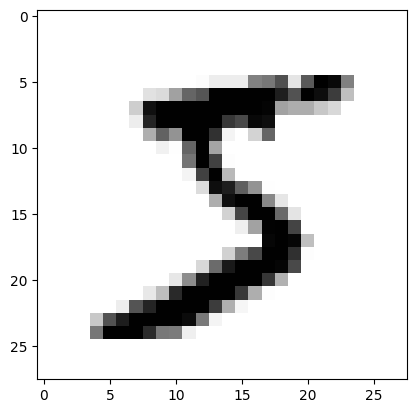

In [8]:
plt.imshow(single_img, cmap='gray_r') # add _r to any colormap to inverse it

In [55]:
y_train.shape

(60000,)

In [56]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
from tensorflow.keras.utils import to_categorical

In [57]:
y_cat_test = to_categorical(y_test, 10)
y_cat_train = to_categorical(y_train, 10)

In [58]:
y_cat_train[0] # should have 1 in index 6 to represent 5

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [59]:
single_img.max()

255

In [60]:
x_train_max = x_train.max()
x_train = x_train / x_train_max
x_test = x_test / x_train_max

In [61]:
scaled_img = x_train[0]
scaled_img.max()

1.0

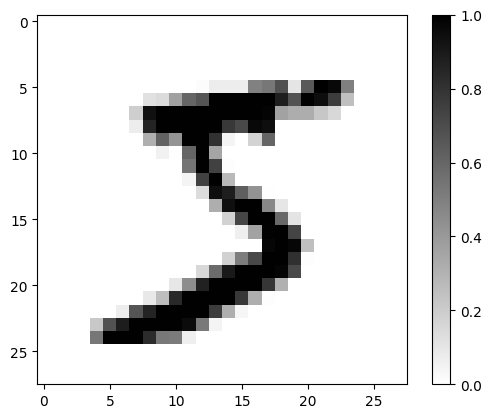

In [21]:
plt.imshow(scaled_img, cmap='gray_r')
plt.colorbar()

In [22]:
x_train.shape

(60000, 28, 28)

In [62]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [33]:
from tensorflow.keras.models import Sequential

In [34]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [63]:
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=4, input_shape=(28,28,1), strides=(1, 1),activation='relu'))
# Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# To feed to dense NN (2D --> 1D)
model.add(Flatten())

# Dense
# Dense hidden layers
model.add(Dense(units=128, activation='relu'))
# Dense output layer
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.build(input_shape=(28,28,1))

In [64]:
model.summary()
# param number for conv2d layer = filters * kernel width * kernel height + 1
# ==> 544 = 32 * 4 * 4 + 1

# param numbers for Dense layer = units of current layer * units of prev. layer (=num. of W's) + units of current layer (=num. of b's)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4608)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 128)               589952    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [65]:
model.fit(x_train, y_cat_train, epochs=2)

Train on 60000 samples
Epoch 1/2
60000/60000 [==============================] - 20s 341us/sample - loss: 0.1337 - accuracy: 0.9591
Epoch 2/2
60000/60000 [==============================] - 20s 331us/sample - loss: 0.0477 - accuracy: 0.9861


In [49]:
model.metrics_names

['loss', 'accuracy']

In [67]:
model.evaluate(x_test, y_cat_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.04608621492406819, 0.9852]

In [68]:
from sklearn.metrics import classification_report

In [69]:
predictions = model.predict_classes(x_test)

In [70]:
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [71]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.99       892
           6       1.00      0.97      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.99      0.99     10000



# 78. Keras Convolutional Neural Networks with CIFAR-10

In [72]:
from tensorflow.keras.datasets import cifar10

In [73]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 37s 0us/step


In [74]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
x_train[0].shape

(32, 32, 3)

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

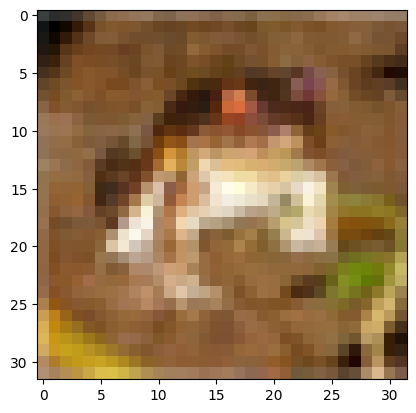

In [77]:
plt.imshow(x_train[0])

In [78]:
y_train.shape

(50000, 1)

In [79]:
y_train[0] # classes: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks

array([6], dtype=uint8)

In [80]:
x_train_max = x_train.max()
x_train = x_train / x_train_max
x_test = x_test / x_train_max

In [81]:
x_test.shape

(10000, 32, 32, 3)

In [82]:
from tensorflow.keras.utils import to_categorical

In [83]:
y_cat_train = to_categorical(y_train, 10)

In [84]:
y_cat_test = to_categorical(y_test, 10)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [86]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=4, input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=4, input_shape=(32,32,3), activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

# usually people add increasing 2^something units in dense layers (i.e. 126, 256, 512)
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.build()

In [87]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               205056    
_________________________________________________________________
dense_23 (Dense)             (None, 10)              

In [88]:
model.fit(x_train, y_cat_train, verbose=1, epochs=6)

Train on 50000 samples
Epoch 1/6
50000/50000 [==============================] - 23s 464us/sample - loss: 1.5137 - accuracy: 0.4566
Epoch 2/6
50000/50000 [==============================] - 22s 435us/sample - loss: 1.1669 - accuracy: 0.5907
Epoch 3/6
50000/50000 [==============================] - 22s 448us/sample - loss: 1.0239 - accuracy: 0.6423
Epoch 4/6
50000/50000 [==============================] - 23s 452us/sample - loss: 0.9225 - accuracy: 0.6801
Epoch 5/6
50000/50000 [==============================] - 22s 446us/sample - loss: 0.8413 - accuracy: 0.7107
Epoch 6/6
50000/50000 [==============================] - 22s 440us/sample - loss: 0.7734 - accuracy: 0.7356


In [89]:
model.metrics_names

['loss', 'accuracy']

In [90]:
model.evaluate(x_test, y_cat_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.060989603996277, 0.6537]

In [91]:
from sklearn.metrics import classification_report

In [92]:
predictions = model.predict_classes(x_test)

In [93]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.74      0.82      0.78      1000
           2       0.64      0.49      0.56      1000
           3       0.45      0.48      0.46      1000
           4       0.67      0.53      0.59      1000
           5       0.48      0.63      0.54      1000
           6       0.72      0.74      0.73      1000
           7       0.66      0.76      0.71      1000
           8       0.75      0.74      0.75      1000
           9       0.81      0.61      0.70      1000

    accuracy                           0.65     10000
   macro avg       0.66      0.65      0.65     10000
weighted avg       0.66      0.65      0.65     10000



# 80. Deep Learning on Custom Images - Part One

In [2]:
import matplotlib.pyplot as plt
import cv2


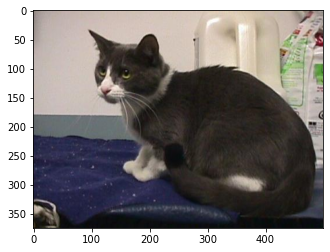

In [3]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')
# Note: make sure the image data folder is: data fold./train fold. and test fold./category 1 fold. and category 2 fold. and ... and category n fold./
# This is important for when we want to use ImageDataGenrator.flow_from_directory('data fold./train')
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)
plt.imshow(cat4)

In [4]:
cat4.shape

(375, 500, 3)

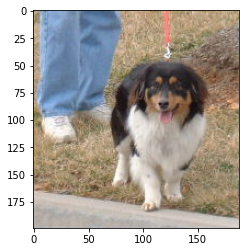

In [5]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)
plt.imshow(dog)

In [6]:
dog.shape

(199, 188, 3)

In [7]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
# ImageDataGenerator will also makes slight transformations of our images (rotation, ...)

2022-09-16 13:09:29.041210: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
img_gen = ImageDataGenerator(rotation_range=30, 
                            width_shift_range=0.1, # resize 10% in x direction
                            height_shift_range=0.1,
                            rescale=1/255, # normalizing
                            shear_range=0.2, # crop image 20% 
                            zoom_range=.2,
                            horizontal_flip=True,
                            fill_mode='nearest' # fill missing values after transformations
                            )

In [9]:
img_gen

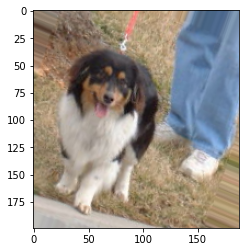

In [10]:
plt.imshow(img_gen.random_transform(dog))

In [11]:
path = '/Users/elmiraghahramani/Documents/GitHub/computer_vision_Udemy_course/CATS_DOGS/'
img_gen.flow_from_directory(path+'train') # once for training once for test

Found 18743 images belonging to 2 classes.


In [23]:
# this model has 100 epochs and takes a long time to train so we just load in the model.
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [21]:
input_shape = (150,150,3)

In [24]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5)) # helps overfitting


model.add(Dense(1)) # binary output
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.build()

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 17, 17, 64)      

In [26]:
batch_size = 16

train_img_gen = img_gen.flow_from_directory(path+'train', #It should contain one subdirectory per class.
                                           target_size=input_shape[:2],
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 18743 images belonging to 2 classes.


In [27]:
test_img_gen = img_gen.flow_from_directory(path+'test',
                                           target_size=input_shape[:2],
                                           batch_size=batch_size,
                                           class_mode='binary')

Found 6251 images belonging to 2 classes.


In [28]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [29]:
results = model.fit_generator(train_img_gen,steps_per_epoch=150, epochs=1, 
                             validation_data=test_img_gen, validation_steps=12)

/var/folders/mq/2m2rd5h112v8vr5mhrwbt3l80000gn/T/ipykernel_14015/110955728.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  results = model.fit_generator(train_img_gen,steps_per_epoch=150, epochs=1,


150/150 [==============================] - 40s 258ms/step - loss: 0.0000e+00 - accuracy: 0.5092 - val_loss: 0.0000e+00 - val_accuracy: 0.5729


In [31]:
results.history['accuracy']

[0.5091666579246521]

In [33]:
# plt.plot(results.history['accuracy']) # we can plot accuracy

In [34]:
# model.save('my_model.h5')

## Predicting on images

In [35]:
train_img_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [37]:
import os
os.getcwd()

'/Users/elmiraghahramani/Documents/GitHub/computer_vision_Udemy_course'

In [40]:
from keras.models import load_model
new_model = load_model('cat_dog_100epochs.h5')

In [54]:
from tensorflow.keras.preprocessing import image
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'
dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)
dog_img.shape

(150, 150, 3)

In [55]:
# to make NN think it's the bach of 1:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)
dog_img.shape

(1, 150, 150, 3)

In [56]:
dog_img = dog_img / 255

In [61]:
pred = new_model.predict(dog_img)

1/1 [==============================] - 0s 26ms/step


In [62]:
pred

array([[0.9939143]], dtype=float32)

In [63]:
np.round(pred)

array([[1.]], dtype=float32)